# Remove outliners
- How to remove outliners by easy way?
- Using this function, you can remove outliners that give negative effects on your data.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## 1. get Data

In [2]:
#put data
train = pd.read_csv('C:/Users/Playdata/DACON★★★/wine/train.csv')
train.head(2)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red


In [3]:
red = pd.DataFrame(train[train['type'] == 'red'])
red.head(2)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
1,1,5,8.8,0.61,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
10,10,6,8.0,0.18,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,red


## 2 . remove index, target and unnecessary columns

In [4]:
red.drop(['index', 'quality', 'type'], axis=1, inplace=True) 

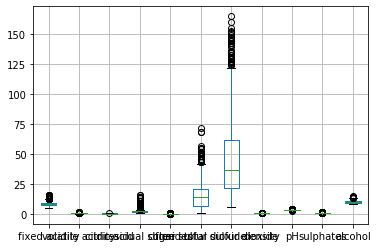

In [5]:
red.boxplot()

## 3. multi-columns delete outliners by using customizied function
- return index to remove

In [6]:
def remove_outliners(train) :
    final_remove = []
    des = pd.DataFrame(train.describe())
    for i in train.columns:
        if i == 'index': #이상치 제거하지 않을 컬럼 추가
            continue
        else :
            IQR = 1.5 * (des[i]['75%']- des[i]['25%'])
            IQR_UP = des[i]['75%'] + IQR
            IQR_DOWM = des[i]['25%']- IQR
            if IQR_DOWM < des[i]['min'] :
                IQR_DOWM = des[i]['min']
            to_remove_index = red.loc[red[i] > IQR_UP].index
            to_remove_index2 = red.loc[red[i] < IQR_DOWM].index
            for j in to_remove_index :
                final_remove.append(j)
            for j in to_remove_index2 :
                final_remove.append(j)
    remove = set(final_remove)
    remove_row = list(remove)        
    return remove_row

In [9]:
remove_row = remove_outliners(red)

## 4. copy data to see plot

In [10]:
reds = red.copy()
for i in remove_row :
    reds.drop(i, axis=0, inplace=True)

In [11]:
red_before = red[['free sulfur dioxide', 'total sulfur dioxide']]
red.drop(['free sulfur dioxide', 'total sulfur dioxide'], axis=1, inplace=True)
reds_after = reds[['free sulfur dioxide', 'total sulfur dioxide']]
reds.drop(['free sulfur dioxide', 'total sulfur dioxide'], axis=1, inplace=True)

## 5. Visualiztion

Text(0.5, 1.0, 'After free sulfur dioxidetotal sulfur dioxide')

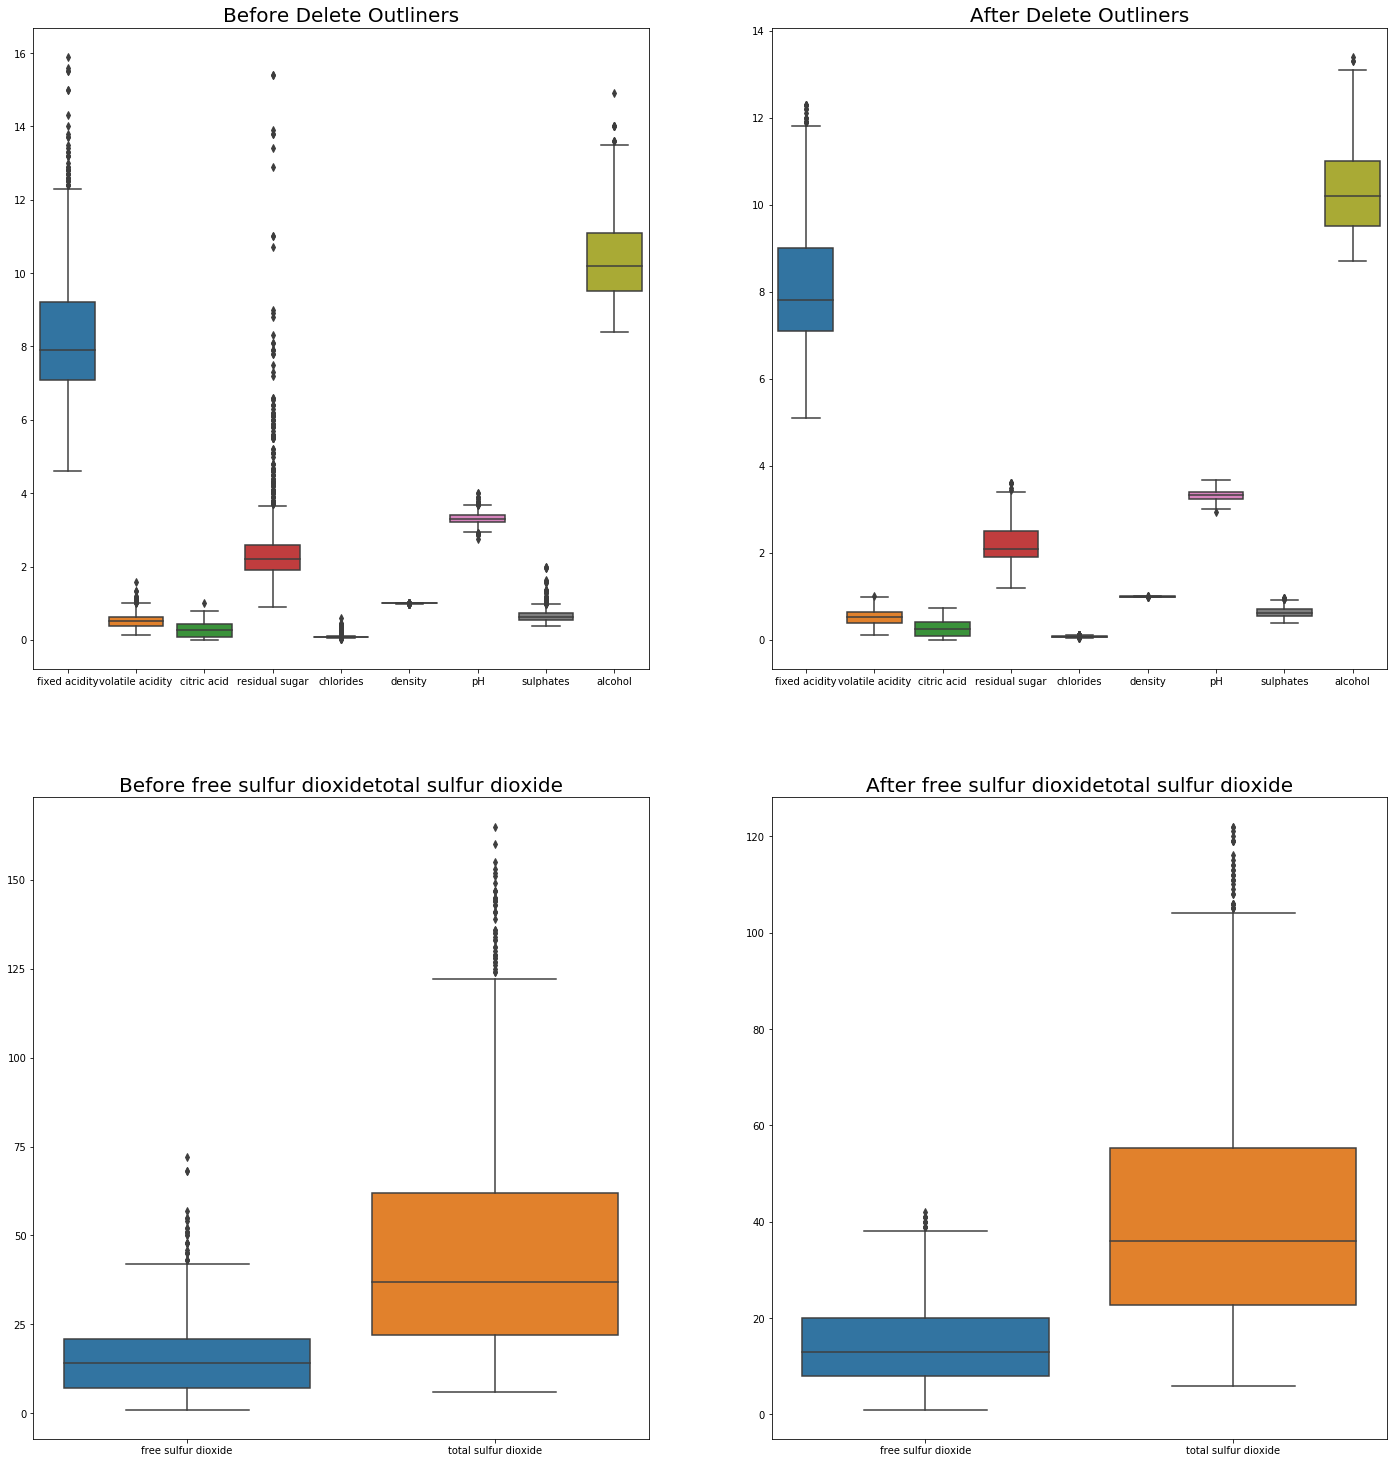

In [12]:
fig , axes = plt.subplots(nrows=2 ,ncols=2,
                          figsize=(20,20) )
plt.subplots_adjust(left=0.05, bottom=0.01, right=0.99, 
                    top=0.99, wspace=None, hspace=0.2)
ax = axes.flatten()
sns.boxplot(data=red , ax = ax[0])
ax[0].set_title('Before Delete Outliners', fontsize= 20)
sns.boxplot(data=reds , ax = ax[1])
ax[1].set_title('After Delete Outliners', fontsize= 20)

sns.boxplot(data=red_before , ax = ax[2])
ax[2].set_title('Before free sulfur dioxide' 'total sulfur dioxide', fontsize= 20)

sns.boxplot(data=reds_after , ax = ax[3])
ax[3].set_title('After free sulfur dioxide' 'total sulfur dioxide', fontsize= 20)